In [1]:
import pickle 
from sklearn.cluster import KMeans
import pandas as pd


feature_path = "/user/zhouyz/rec/recbole_v2/dataset/m4a/m4a-muq.pkl"
with open(feature_path, 'rb') as f:
    m4a_muq = pickle.load(f)

In [2]:
import numpy as np
vectors = np.array(list(m4a_muq.values()))
vectors.shape # (109269, 12, 1024)

(109269, 12, 1024)

In [4]:
def cluster_features(features, selected_layer=-1, n_clusters=10):
    keys = list(features.keys())
    vectors = np.array(list(m4a_muq.values()))[:, selected_layer, :]
    all_results = []
    print("开始聚类...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')

    kmeans.fit(vectors)
    labels = kmeans.labels_

    clustered_results = {key: label for key, label in zip(keys, labels)}

    return clustered_results

In [5]:
import os
n_clusters = 16
output_dir = "/user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans"
os.makedirs(output_dir, exist_ok=True)
item_ids = list(m4a_muq.keys())
# 创建一个空的 DataFrame 来存储所有层的聚类结果
all_clusters_df = pd.DataFrame(index=item_ids)

# 聚类每一层特征
for layer in range(12):
    print(f"聚类第 {layer} 层特征，聚类数目为 {n_clusters}")
    clustered_results = cluster_features(m4a_muq, selected_layer=layer, n_clusters=n_clusters)
    # 将当前层的结果作为新的一列添加到 DataFrame
    all_clusters_df[f'layer_{layer}'] = pd.Series(clustered_results)

output_path = os.path.join(output_dir, "m4a-muq-all-layers-clusters.csv")
all_clusters_df.to_csv(output_path)

print(f"所有层的聚类结果已合并并保存到 {output_path}")
all_clusters_df.head()

聚类第 0 层特征，聚类数目为 16
开始聚类...
聚类第 1 层特征，聚类数目为 16
开始聚类...
聚类第 2 层特征，聚类数目为 16
开始聚类...
聚类第 3 层特征，聚类数目为 16
开始聚类...
聚类第 4 层特征，聚类数目为 16
开始聚类...
聚类第 5 层特征，聚类数目为 16
开始聚类...
聚类第 6 层特征，聚类数目为 16
开始聚类...
聚类第 7 层特征，聚类数目为 16
开始聚类...
聚类第 8 层特征，聚类数目为 16
开始聚类...
聚类第 9 层特征，聚类数目为 16
开始聚类...
聚类第 10 层特征，聚类数目为 16
开始聚类...
聚类第 11 层特征，聚类数目为 16
开始聚类...
所有层的聚类结果已合并并保存到 /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters.csv


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
nY8kSl5gwdOeaEW0,15,1,2,13,9,7,15,12,13,1,6,4
I1aB08TPOyXMf8qh,14,11,0,12,2,1,2,9,7,7,8,6
VPT4olSly49ZNqlh,12,10,4,5,7,8,5,15,8,2,15,11
x48pzNjf6mlUJ27f,13,9,11,6,8,6,9,5,14,3,5,10
AkeYqvR2u32f0Zfa,0,15,13,0,0,5,0,0,0,13,11,0


In [10]:

import os

# 设置不同的聚类数
cluster_numbers = [8, 16, 32, 64]
output_dir = "/user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans"
os.makedirs(output_dir, exist_ok=True)
item_ids = list(m4a_muq.keys())
results = {}
for n_clusters in cluster_numbers:
    print(f"===== 开始处理聚类数: {n_clusters} =====")
    # 创建一个空的 DataFrame 来存储所有层的聚类结果
    all_clusters_df = pd.DataFrame(index=item_ids)

    # 聚类每一层特征
    for layer in range(12):
        print(f"聚类第 {layer} 层特征，聚类数目为 {n_clusters}")
        clustered_results = cluster_features(m4a_muq, selected_layer=layer, n_clusters=n_clusters)
        # 将当前层的结果作为新的一列添加到 DataFrame
        all_clusters_df[f'layer_{layer}'] = pd.Series(clustered_results)

    # 为每个聚类数生成不同的文件名
    output_filename = f"m4a-muq-all-layers-clusters-{n_clusters}.csv"
    output_path = os.path.join(output_dir, output_filename)
    all_clusters_df.to_csv(output_path)
    results[n_clusters] = all_clusters_df

    print(f"聚类数为 {n_clusters} 的结果已保存到 {output_path}")
    print(f"===== 完成处理聚类数: {n_clusters} =====\n")

print("所有聚类任务完成。")


===== 开始处理聚类数: 8 =====
聚类第 0 层特征，聚类数目为 8
开始聚类...
聚类第 1 层特征，聚类数目为 8
开始聚类...
聚类第 2 层特征，聚类数目为 8
开始聚类...
聚类第 3 层特征，聚类数目为 8
开始聚类...
聚类第 4 层特征，聚类数目为 8
开始聚类...
聚类第 5 层特征，聚类数目为 8
开始聚类...
聚类第 6 层特征，聚类数目为 8
开始聚类...
聚类第 7 层特征，聚类数目为 8
开始聚类...
聚类第 8 层特征，聚类数目为 8
开始聚类...
聚类第 9 层特征，聚类数目为 8
开始聚类...
聚类第 10 层特征，聚类数目为 8
开始聚类...
聚类第 11 层特征，聚类数目为 8
开始聚类...
聚类数为 8 的结果已保存到 /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-8.csv
===== 完成处理聚类数: 8 =====

===== 开始处理聚类数: 16 =====
聚类第 0 层特征，聚类数目为 16
开始聚类...
聚类第 1 层特征，聚类数目为 16
开始聚类...
聚类第 2 层特征，聚类数目为 16
开始聚类...
聚类第 3 层特征，聚类数目为 16
开始聚类...
聚类第 4 层特征，聚类数目为 16
开始聚类...
聚类第 5 层特征，聚类数目为 16
开始聚类...
聚类第 6 层特征，聚类数目为 16
开始聚类...
聚类第 7 层特征，聚类数目为 16
开始聚类...
聚类第 8 层特征，聚类数目为 16
开始聚类...
聚类第 9 层特征，聚类数目为 16
开始聚类...
聚类第 10 层特征，聚类数目为 16
开始聚类...
聚类第 11 层特征，聚类数目为 16
开始聚类...
聚类数为 16 的结果已保存到 /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-16.csv
===== 完成处理聚类数: 16 =====

===== 开始处理聚类数: 32 =====
聚类第 0 层特征，聚类数目为 32
开始聚类...
聚类第 1 层特征，聚类数目为 32


In [1]:
import os
import pandas as pd

# 设置不同的聚类数
cluster_numbers = [8, 16, 32, 64]
output_dir = "/user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans"

# 用于存储从文件读取的结果
loaded_results = {}

for n_clusters in cluster_numbers:
    input_filename = f"m4a-muq-all-layers-clusters-{n_clusters}.csv"
    input_path = os.path.join(output_dir, input_filename)
    
    if os.path.exists(input_path):
        print(f"正在读取文件: {input_path}")
        # 读取 CSV 文件，并将第一列作为索引
        df = pd.read_csv(input_path, index_col=0)
        loaded_results[n_clusters] = df
    else:
        print(f"文件未找到: {input_path}")


正在读取文件: /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-8.csv
正在读取文件: /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-16.csv
正在读取文件: /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-32.csv
正在读取文件: /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-64.csv


In [3]:
output_dir_token = "/user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans"
for n_clusters, df in loaded_results.items():
    # 创建一个副本以避免修改原始加载的数据
    modified_df = df.copy()
    
    # 在每列的列名后添加 ':token'
    modified_df.columns = [f"{col}:token" for col in modified_df.columns]
    
    # 将索引重置为一列
    modified_df.reset_index(inplace=True)
    
    # 将新的索引列重命名为 'tracks_id:token'
    # read_csv(index_col=0) 使用第一列作为索引，如果该列没有名字，reset_index() 会创建名为 'index' 的列
    modified_df.rename(columns={'index': 'tracks_id:token'}, inplace=True)
    
    # 获取原始文件名并构建新的保存路径
    output_filename = f"m4a-muq-all-layers-clusters-{n_clusters}.item"
    output_path = os.path.join(output_dir_token, output_filename)
    modified_df.to_csv(output_path, index=False, sep='\t')
    
    print(f"已将 n_clusters={n_clusters} 的结果处理并保存到: {output_path}")

已将 n_clusters=8 的结果处理并保存到: /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-8.item
已将 n_clusters=16 的结果处理并保存到: /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-16.item
已将 n_clusters=32 的结果处理并保存到: /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-32.item
已将 n_clusters=64 的结果处理并保存到: /user/zhouyz/rec/recbole_v2/dataset/m4a/kmeans/m4a-muq-all-layers-clusters-64.item


In [7]:
from sklearn.metrics import adjusted_rand_score

# 提取 layer_0 和 layer_1 的聚类标签
labels_layer0 = all_clusters_df['layer_0']
labels_layer1 = all_clusters_df['layer_1']

# 计算调整兰德指数 (ARI)
ari = adjusted_rand_score(labels_layer0, labels_layer1)

print(f"Layer 0 和 Layer 1 聚类结果的调整兰德指数 (ARI) 是: {ari:.4f}")

# 解释 ARI 分数
if ari > 0.9:
    print("聚类结果高度相似。")
elif ari > 0.6:
    print("聚类结果中度相似。")
else:
    print("聚类结果相似度较低。")

Layer 0 和 Layer 1 聚类结果的调整兰德指数 (ARI) 是: 0.4752
聚类结果相似度较低。


各层聚类结果之间的调整兰德指数 (ARI) 表格:


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.475250,0.366920,0.314832,0.317450,0.302455,0.264369,0.229992,0.210207,0.149057,0.125669,0.124371
layer_1,0.475250,1.000000,0.465658,0.398928,0.446673,0.372556,0.337548,0.286086,0.269887,0.197529,0.147285,0.154742
layer_2,0.366920,0.465658,1.000000,0.536338,0.482427,0.492441,0.444407,0.353582,0.332398,0.253526,0.185287,0.187701
layer_3,0.314832,0.398928,0.536338,1.000000,0.585117,0.627024,0.522456,0.491598,0.440588,0.291991,0.198800,0.204670
layer_4,0.317450,0.446673,0.482427,0.585117,1.000000,0.597288,0.528890,0.429925,0.396320,0.248185,0.177951,0.181640
layer_5,0.302455,0.372556,0.492441,0.627024,0.597288,1.000000,0.690573,0.542749,0.487340,0.287527,0.217267,0.205332
layer_6,0.264369,0.337548,0.444407,0.522456,0.528890,0.690573,1.000000,0.538486,0.570542,0.335806,0.237024,0.225908
layer_7,0.229992,0.286086,0.353582,0.491598,0.429925,0.542749,0.538486,1.000000,0.640182,0.347819,0.257785,0.239124
layer_8,0.210207,0.269887,0.332398,0.440588,0.396320,0.487340,0.570542,0.640182,1.000000,0.408361,0.282121,0.263972
layer_9,0.149057,0.197529,0.253526,0.291991,0.248185,0.287527,0.335806,0.347819,0.408361,1.000000,0.391911,0.377254


/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23618 (\N{CJK UNIFIED IDEOGRAPH-5C42}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/user/zhouyz/anaconda3/envs/zhouyz/lib/python3.9/site-packages/IPython/core/pylabtoo

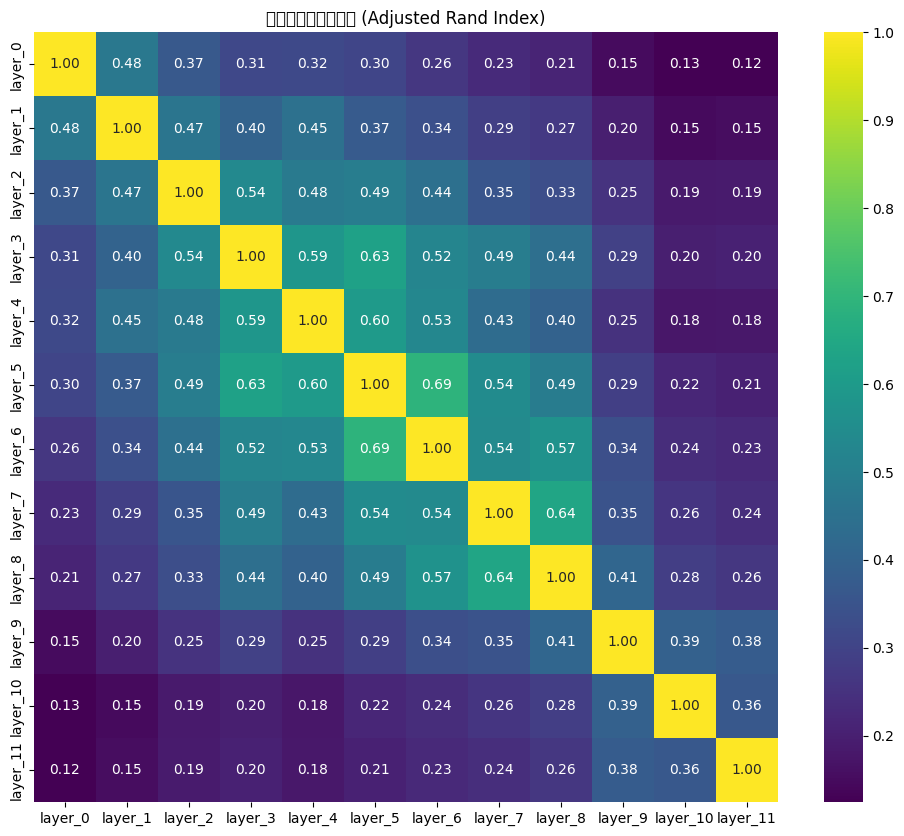

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

num_layers = 12
layer_names = [f'layer_{i}' for i in range(num_layers)]

# 初始化一个空的 DataFrame 来存储 ARI 分数
ari_matrix = pd.DataFrame(np.zeros((num_layers, num_layers)), index=layer_names, columns=layer_names)

# 两两计算 ARI 分数
for i in range(num_layers):
    for j in range(i, num_layers):
        labels_i = all_clusters_df[f'layer_{i}']
        labels_j = all_clusters_df[f'layer_{j}']
        
        ari = adjusted_rand_score(labels_i, labels_j)
        
        ari_matrix.iloc[i, j] = ari
        ari_matrix.iloc[j, i] = ari

print("各层聚类结果之间的调整兰德指数 (ARI) 表格:")
display(ari_matrix)

# 使用热力图可视化 ARI 矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(ari_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Adjusted Rand Index')
plt.show()

===== 正在处理聚类数: 8 =====
各层聚类结果之间的调整兰德指数 (ARI) 表格 (n_clusters=8):


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.604775,0.382969,0.351603,0.334002,0.296501,0.272250,0.263400,0.224642,0.169095,0.169003,0.168817
layer_1,0.604775,1.000000,0.492262,0.453799,0.420441,0.384255,0.365403,0.351650,0.296266,0.201973,0.202986,0.197513
layer_2,0.382969,0.492262,1.000000,0.800527,0.745500,0.635365,0.513683,0.485937,0.420660,0.237778,0.234406,0.219445
layer_3,0.351603,0.453799,0.800527,1.000000,0.851782,0.689460,0.554781,0.518979,0.453048,0.267274,0.252827,0.230267
layer_4,0.334002,0.420441,0.745500,0.851782,1.000000,0.748159,0.559197,0.527190,0.451930,0.270226,0.246794,0.229338
layer_5,0.296501,0.384255,0.635365,0.689460,0.748159,1.000000,0.581584,0.555896,0.464178,0.276137,0.253329,0.238647
layer_6,0.272250,0.365403,0.513683,0.554781,0.559197,0.581584,1.000000,0.861696,0.661978,0.344115,0.319204,0.292294
layer_7,0.263400,0.351650,0.485937,0.518979,0.527190,0.555896,0.861696,1.000000,0.686501,0.355528,0.326756,0.300740
layer_8,0.224642,0.296266,0.420660,0.453048,0.451930,0.464178,0.661978,0.686501,1.000000,0.451125,0.394540,0.374619
layer_9,0.169095,0.201973,0.237778,0.267274,0.270226,0.276137,0.344115,0.355528,0.451125,1.000000,0.483528,0.486527


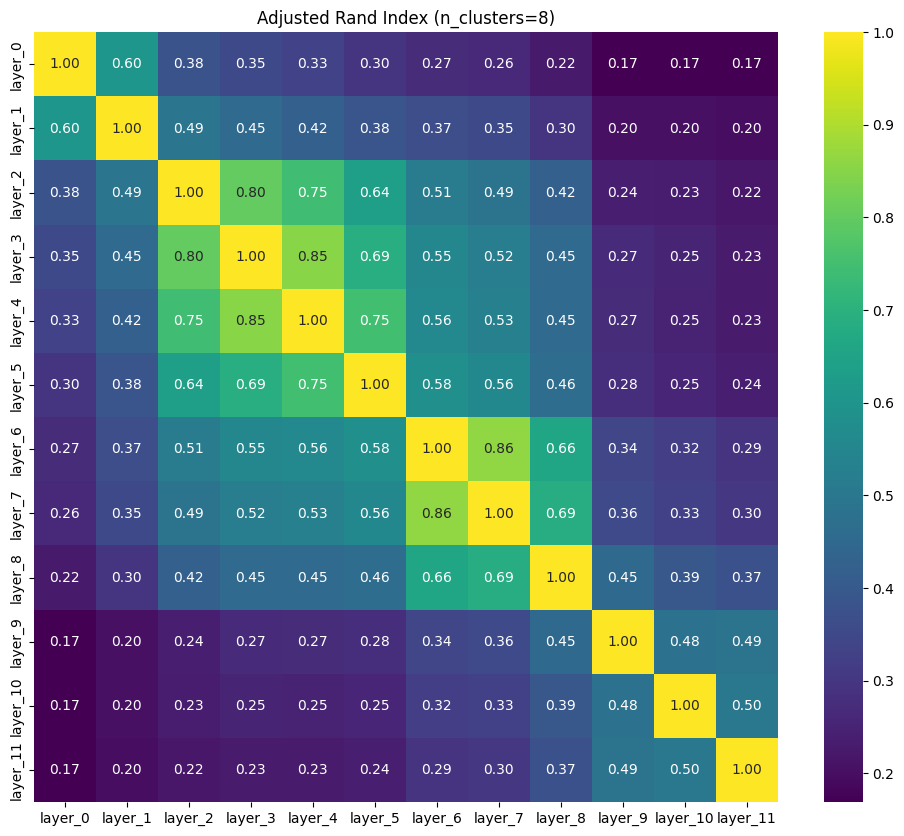



===== 正在处理聚类数: 16 =====
各层聚类结果之间的调整兰德指数 (ARI) 表格 (n_clusters=16):


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.475430,0.366706,0.314832,0.317450,0.302455,0.264373,0.229992,0.210189,0.149065,0.125689,0.124415
layer_1,0.475430,1.000000,0.464894,0.399184,0.446935,0.372679,0.337667,0.286099,0.269903,0.197551,0.147284,0.154771
layer_2,0.366706,0.464894,1.000000,0.533908,0.481181,0.491624,0.443855,0.353091,0.332168,0.253539,0.185328,0.187789
layer_3,0.314832,0.399184,0.533908,1.000000,0.585117,0.627024,0.522654,0.491598,0.440653,0.291942,0.198826,0.204799
layer_4,0.317450,0.446935,0.481181,0.585117,1.000000,0.597288,0.528990,0.429925,0.396295,0.248173,0.177986,0.181685
layer_5,0.302455,0.372679,0.491624,0.627024,0.597288,1.000000,0.690911,0.542749,0.487311,0.287474,0.217276,0.205408
layer_6,0.264373,0.337667,0.443855,0.522654,0.528990,0.690911,1.000000,0.538694,0.570697,0.335817,0.237086,0.225937
layer_7,0.229992,0.286099,0.353091,0.491598,0.429925,0.542749,0.538694,1.000000,0.640309,0.347779,0.257778,0.239215
layer_8,0.210189,0.269903,0.332168,0.440653,0.396295,0.487311,0.570697,0.640309,1.000000,0.408361,0.282161,0.264112
layer_9,0.149065,0.197551,0.253539,0.291942,0.248173,0.287474,0.335817,0.347779,0.408361,1.000000,0.391971,0.377567


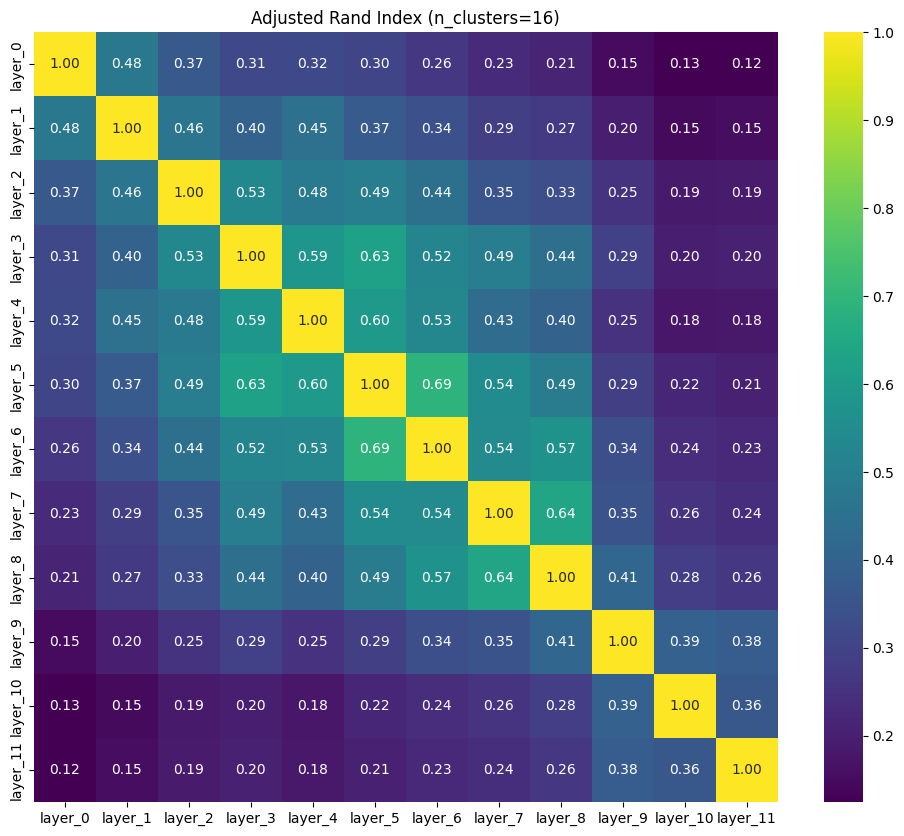



===== 正在处理聚类数: 32 =====
各层聚类结果之间的调整兰德指数 (ARI) 表格 (n_clusters=32):


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.410104,0.292841,0.289389,0.308444,0.267734,0.255143,0.222471,0.201544,0.139403,0.112913,0.104070
layer_1,0.410104,1.000000,0.403640,0.353452,0.330541,0.311211,0.294795,0.251815,0.239389,0.155949,0.122465,0.114128
layer_2,0.292841,0.403640,1.000000,0.505715,0.429931,0.447149,0.394483,0.332657,0.353504,0.224657,0.175454,0.161114
layer_3,0.289389,0.353452,0.505715,1.000000,0.580311,0.523503,0.432079,0.310142,0.345872,0.227343,0.181301,0.156700
layer_4,0.308444,0.330541,0.429931,0.580311,1.000000,0.532774,0.449766,0.334988,0.341303,0.223061,0.171230,0.151902
layer_5,0.267734,0.311211,0.447149,0.523503,0.532774,1.000000,0.511329,0.375890,0.420790,0.250487,0.193466,0.171287
layer_6,0.255143,0.294795,0.394483,0.432079,0.449766,0.511329,1.000000,0.492206,0.456298,0.287299,0.214845,0.183416
layer_7,0.222471,0.251815,0.332657,0.310142,0.334988,0.375890,0.492206,1.000000,0.423272,0.266719,0.217611,0.182529
layer_8,0.201544,0.239389,0.353504,0.345872,0.341303,0.420790,0.456298,0.423272,1.000000,0.347101,0.257602,0.240189
layer_9,0.139403,0.155949,0.224657,0.227343,0.223061,0.250487,0.287299,0.266719,0.347101,1.000000,0.399297,0.352718


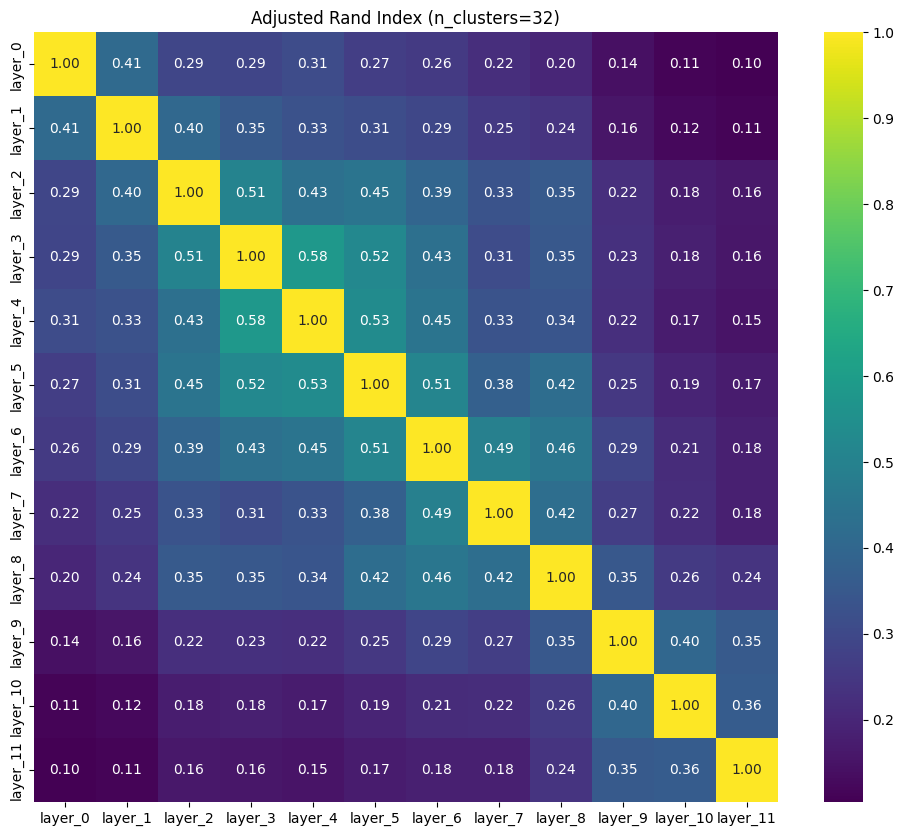



===== 正在处理聚类数: 64 =====
各层聚类结果之间的调整兰德指数 (ARI) 表格 (n_clusters=64):


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.354175,0.263463,0.229680,0.236477,0.239445,0.184856,0.188697,0.164770,0.108767,0.076305,0.071227
layer_1,0.354175,1.000000,0.353862,0.300405,0.301357,0.279446,0.229760,0.227431,0.204320,0.132390,0.092223,0.085201
layer_2,0.263463,0.353862,1.000000,0.405073,0.344555,0.361930,0.293586,0.303336,0.263874,0.174691,0.120659,0.112304
layer_3,0.229680,0.300405,0.405073,1.000000,0.416089,0.437682,0.347960,0.308086,0.292782,0.174338,0.118380,0.108567
layer_4,0.236477,0.301357,0.344555,0.416089,1.000000,0.424919,0.348311,0.300295,0.291930,0.172356,0.119523,0.108305
layer_5,0.239445,0.279446,0.361930,0.437682,0.424919,1.000000,0.363958,0.356893,0.291890,0.179577,0.125095,0.111498
layer_6,0.184856,0.229760,0.293586,0.347960,0.348311,0.363958,1.000000,0.427871,0.323829,0.211763,0.146596,0.130884
layer_7,0.188697,0.227431,0.303336,0.308086,0.300295,0.356893,0.427871,1.000000,0.359627,0.233722,0.164144,0.144170
layer_8,0.164770,0.204320,0.263874,0.292782,0.291930,0.291890,0.323829,0.359627,1.000000,0.277616,0.178152,0.162673
layer_9,0.108767,0.132390,0.174691,0.174338,0.172356,0.179577,0.211763,0.233722,0.277616,1.000000,0.313398,0.246125


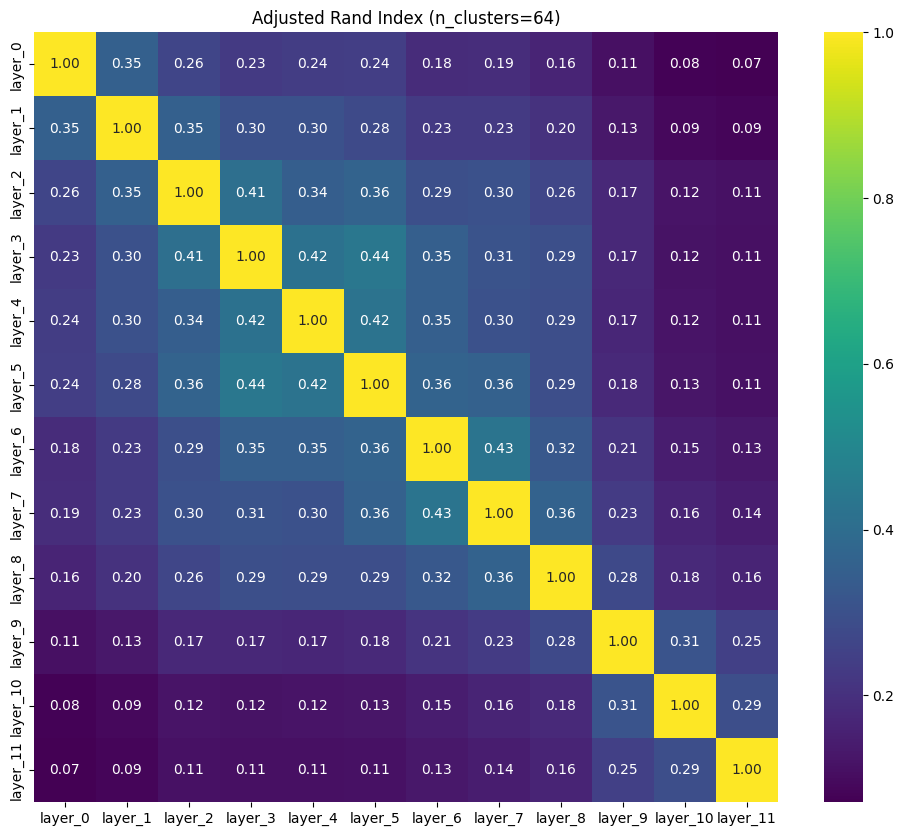

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# 检查 loaded_results 是否有内容
if not loaded_results:
    print("没有加载任何结果，请先运行前面的单元格加载数据。")
else:
    num_layers = 12
    layer_names = [f'layer_{i}' for i in range(num_layers)]

    # 遍历每个聚类数的结果
    for n_clusters, df in loaded_results.items():
        print(f"===== 正在处理聚类数: {n_clusters} =====")
        
        # 初始化一个空的 DataFrame 来存储 ARI 分数
        ari_matrix = pd.DataFrame(np.zeros((num_layers, num_layers)), index=layer_names, columns=layer_names)

        # 两两计算 ARI 分数
        for i in range(num_layers):
            for j in range(i, num_layers):
                labels_i = df[f'layer_{i}']
                labels_j = df[f'layer_{j}']
                
                ari = adjusted_rand_score(labels_i, labels_j)
                
                ari_matrix.iloc[i, j] = ari
                ari_matrix.iloc[j, i] = ari

        print(f"各层聚类结果之间的调整兰德指数 (ARI) 表格 (n_clusters={n_clusters}):")
        display(ari_matrix)

        # 使用热力图可视化 ARI 矩阵
        plt.figure(figsize=(12, 10))
        sns.heatmap(ari_matrix, annot=True, fmt=".2f", cmap='viridis')
        plt.title(f'Adjusted Rand Index (n_clusters={n_clusters})')
        plt.show()
        print("\n")

===== 正在处理聚类数: 8 (Adjusted Mutual Information) =====
各层聚类结果之间的调整互信息 (AMI) 表格 (n_clusters=8):


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.647100,0.492916,0.462381,0.447739,0.419179,0.384676,0.374196,0.306342,0.253133,0.222054,0.239561
layer_1,0.647100,1.000000,0.578925,0.541989,0.515158,0.488019,0.453852,0.439245,0.363295,0.287916,0.260155,0.270783
layer_2,0.492916,0.578925,1.000000,0.792732,0.745185,0.669508,0.571695,0.548085,0.461000,0.337999,0.301770,0.315374
layer_3,0.462381,0.541989,0.792732,1.000000,0.837077,0.718489,0.607998,0.577818,0.486382,0.360649,0.317002,0.325386
layer_4,0.447739,0.515158,0.745185,0.837077,1.000000,0.764701,0.616708,0.589171,0.488081,0.363193,0.312873,0.324306
layer_5,0.419179,0.488019,0.669508,0.718489,0.764701,1.000000,0.650042,0.624126,0.512733,0.380232,0.329534,0.338586
layer_6,0.384676,0.453852,0.571695,0.607998,0.616708,0.650042,1.000000,0.842875,0.654649,0.439360,0.395047,0.397664
layer_7,0.374196,0.439245,0.548085,0.577818,0.589171,0.624126,0.842875,1.000000,0.684109,0.454996,0.407513,0.409223
layer_8,0.306342,0.363295,0.461000,0.486382,0.488081,0.512733,0.654649,0.684109,1.000000,0.546619,0.483776,0.490036
layer_9,0.253133,0.287916,0.337999,0.360649,0.363193,0.380232,0.439360,0.454996,0.546619,1.000000,0.584819,0.570749


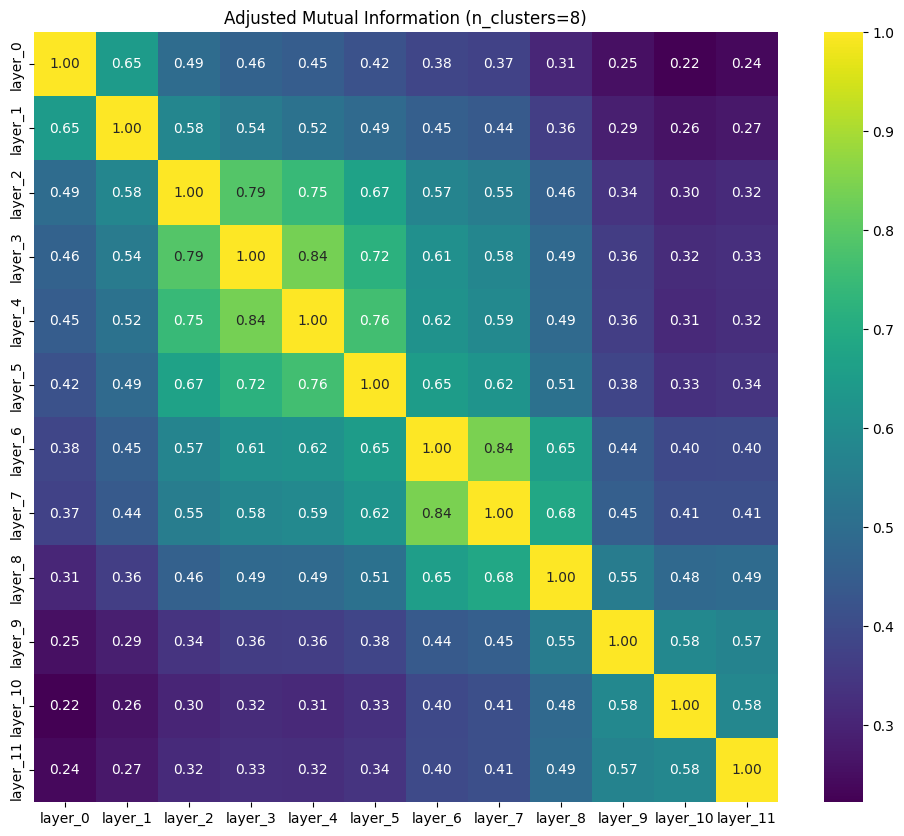



===== 正在处理聚类数: 16 (Adjusted Mutual Information) =====
各层聚类结果之间的调整互信息 (AMI) 表格 (n_clusters=16):


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.594117,0.510337,0.466563,0.466447,0.441463,0.405484,0.393264,0.370693,0.294163,0.235174,0.244918
layer_1,0.594117,1.000000,0.579908,0.529473,0.552929,0.493594,0.459801,0.439828,0.416317,0.333213,0.265208,0.273408
layer_2,0.510337,0.579908,1.000000,0.661432,0.604441,0.605471,0.565307,0.511362,0.484973,0.403259,0.320902,0.328749
layer_3,0.466563,0.529473,0.661432,1.000000,0.675994,0.702613,0.630463,0.596021,0.552925,0.435486,0.339187,0.346592
layer_4,0.466447,0.552929,0.604441,0.675994,1.000000,0.667417,0.615753,0.556125,0.517595,0.395254,0.306316,0.314780
layer_5,0.441463,0.493594,0.605471,0.702613,0.667417,1.000000,0.741290,0.639551,0.592510,0.444561,0.358503,0.355787
layer_6,0.405484,0.459801,0.565307,0.630463,0.615753,0.741290,1.000000,0.661077,0.657258,0.485555,0.386031,0.379156
layer_7,0.393264,0.439828,0.511362,0.596021,0.556125,0.639551,0.661077,1.000000,0.715679,0.510818,0.407234,0.399406
layer_8,0.370693,0.416317,0.484973,0.552925,0.517595,0.592510,0.657258,0.715679,1.000000,0.569040,0.449290,0.438391
layer_9,0.294163,0.333213,0.403259,0.435486,0.395254,0.444561,0.485555,0.510818,0.569040,1.000000,0.548707,0.530167


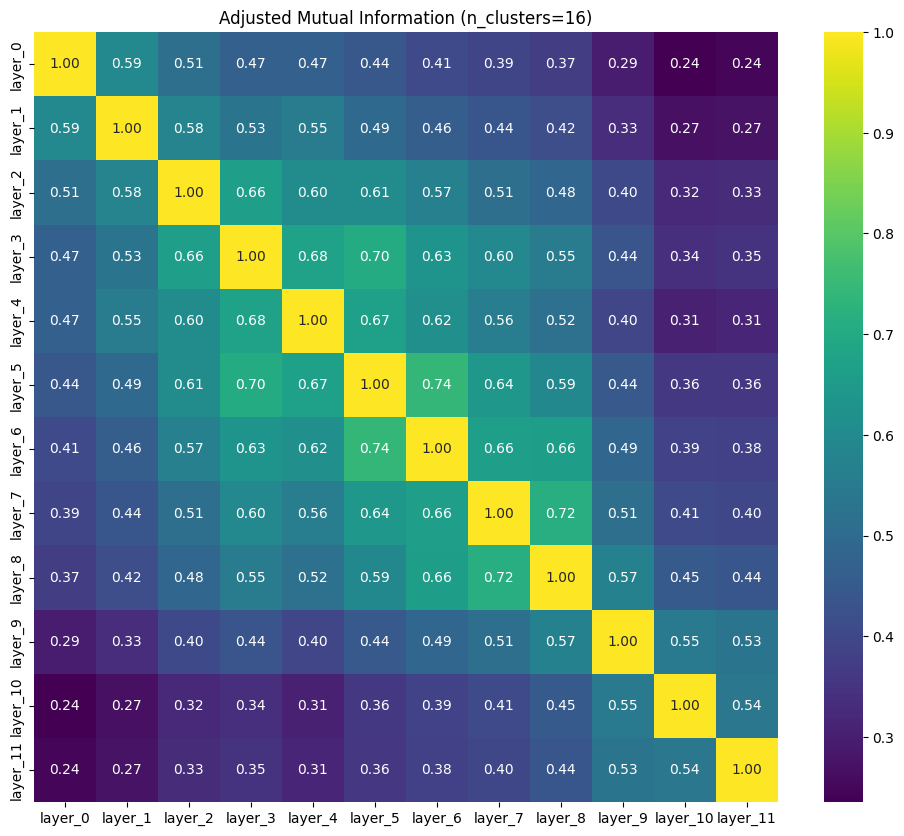



===== 正在处理聚类数: 32 (Adjusted Mutual Information) =====
各层聚类结果之间的调整互信息 (AMI) 表格 (n_clusters=32):


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.598305,0.510471,0.501640,0.510060,0.472314,0.444539,0.413085,0.405193,0.316292,0.269996,0.265376
layer_1,0.598305,1.000000,0.590679,0.560453,0.546937,0.522436,0.489517,0.453959,0.448292,0.344214,0.294067,0.287137
layer_2,0.510471,0.590679,1.000000,0.671083,0.623407,0.619339,0.574799,0.525326,0.532381,0.411474,0.356472,0.339962
layer_3,0.501640,0.560453,0.671083,1.000000,0.706316,0.661362,0.604377,0.525805,0.536006,0.421901,0.365192,0.341670
layer_4,0.510060,0.546937,0.623407,0.706316,1.000000,0.676592,0.614695,0.541845,0.541454,0.418249,0.357388,0.335739
layer_5,0.472314,0.522436,0.619339,0.661362,0.676592,1.000000,0.672406,0.578328,0.592463,0.443478,0.380427,0.355099
layer_6,0.444539,0.489517,0.574799,0.604377,0.614695,0.672406,1.000000,0.654864,0.620954,0.480741,0.412094,0.378699
layer_7,0.413085,0.453959,0.525326,0.525805,0.541845,0.578328,0.654864,1.000000,0.615838,0.483521,0.424198,0.391344
layer_8,0.405193,0.448292,0.532381,0.536006,0.541454,0.592463,0.620954,0.615838,1.000000,0.549030,0.466523,0.444582
layer_9,0.316292,0.344214,0.411474,0.421901,0.418249,0.443478,0.480741,0.483521,0.549030,1.000000,0.604725,0.550559


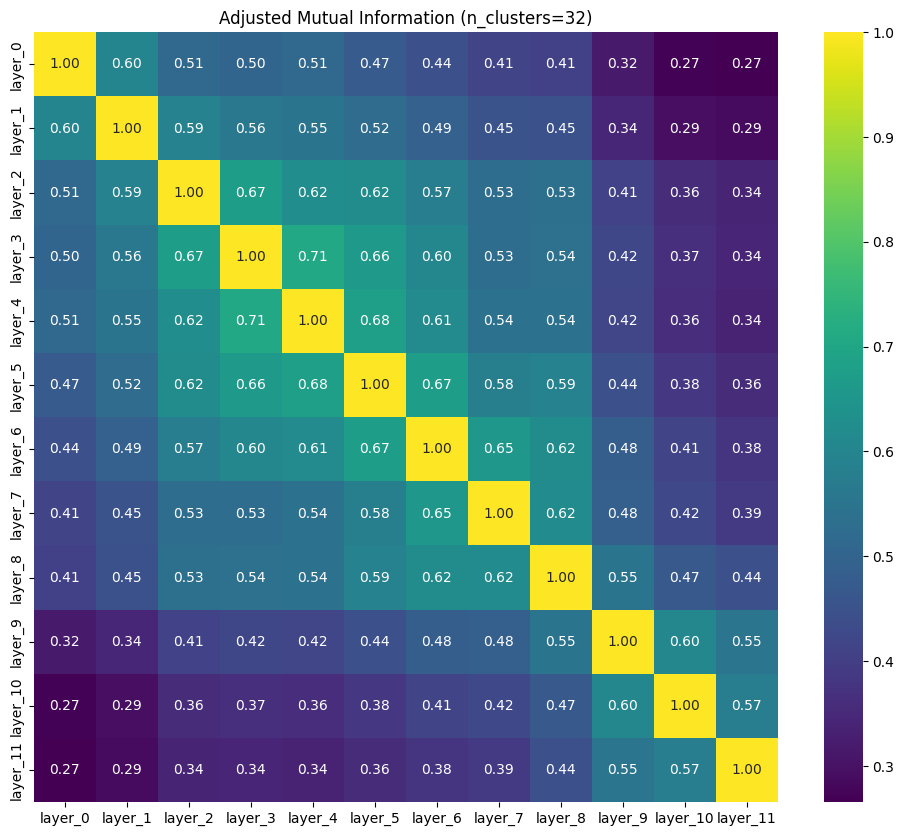



===== 正在处理聚类数: 64 (Adjusted Mutual Information) =====
各层聚类结果之间的调整互信息 (AMI) 表格 (n_clusters=64):


,layer_0,layer_1,layer_2,layer_3,layer_4,layer_5,layer_6,layer_7,layer_8,layer_9,layer_10,layer_11
layer_0,1.000000,0.600768,0.524193,0.501680,0.500824,0.495881,0.446665,0.439741,0.420879,0.334864,0.268265,0.262927
layer_1,0.600768,1.000000,0.591610,0.559916,0.555558,0.538601,0.490886,0.479298,0.458733,0.366036,0.293938,0.285782
layer_2,0.524193,0.591610,1.000000,0.640444,0.603987,0.606077,0.559116,0.546323,0.523702,0.427784,0.351350,0.338748
layer_3,0.501680,0.559916,0.640444,1.000000,0.651208,0.656601,0.599887,0.565550,0.547123,0.431817,0.354486,0.341089
layer_4,0.500824,0.555558,0.603987,0.651208,1.000000,0.662220,0.598668,0.558455,0.545117,0.427845,0.348771,0.336267
layer_5,0.495881,0.538601,0.606077,0.656601,0.662220,1.000000,0.622565,0.605340,0.560012,0.443433,0.362126,0.347650
layer_6,0.446665,0.490886,0.559116,0.599887,0.598668,0.622565,1.000000,0.649722,0.585021,0.477923,0.399922,0.380779
layer_7,0.439741,0.479298,0.546323,0.565550,0.558455,0.605340,0.649722,1.000000,0.609319,0.491786,0.410579,0.384997
layer_8,0.420879,0.458733,0.523702,0.547123,0.545117,0.560012,0.585021,0.609319,1.000000,0.543108,0.445595,0.428151
layer_9,0.334864,0.366036,0.427784,0.431817,0.427845,0.443433,0.477923,0.491786,0.543108,1.000000,0.580473,0.522530


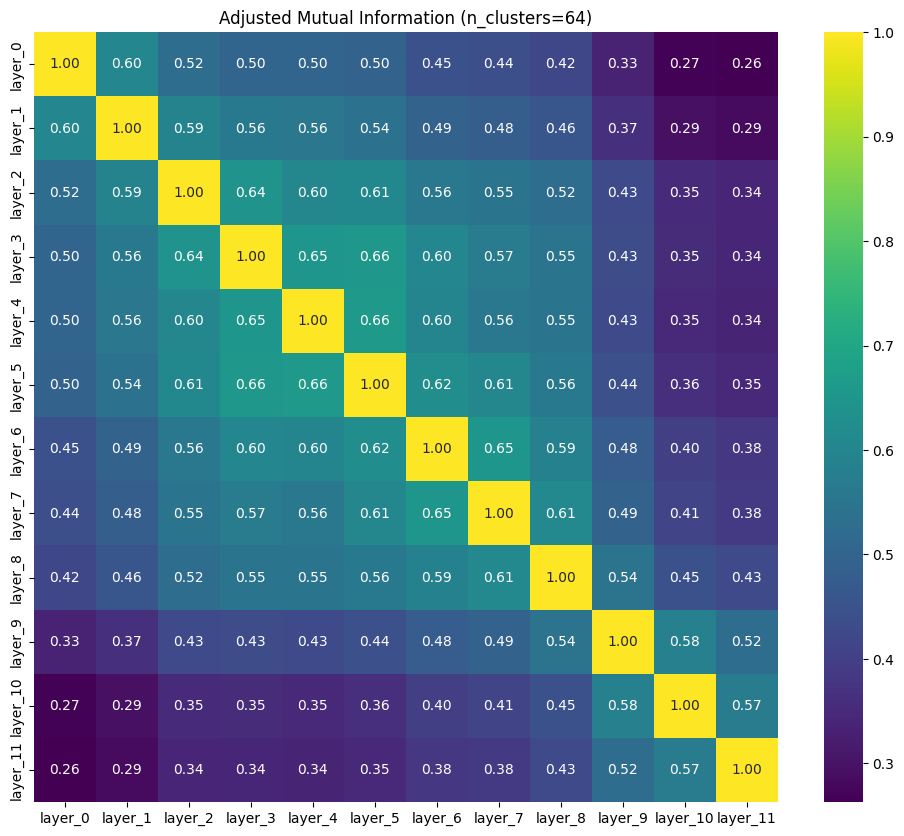

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_mutual_info_score

# 检查 loaded_results 是否有内容
if not loaded_results:
    print("没有加载任何结果，请先运行前面的单元格加载数据。")
else:
    num_layers = 12
    layer_names = [f'layer_{i}' for i in range(num_layers)]

    # 遍历每个聚类数的结果
    for n_clusters, df in loaded_results.items():
        print(f"===== 正在处理聚类数: {n_clusters} (Adjusted Mutual Information) =====")
        
        # 初始化一个空的 DataFrame 来存储 AMI 分数
        ami_matrix = pd.DataFrame(np.zeros((num_layers, num_layers)), index=layer_names, columns=layer_names)

        # 两两计算 AMI 分数
        for i in range(num_layers):
            for j in range(i, num_layers):
                labels_i = df[f'layer_{i}']
                labels_j = df[f'layer_{j}']
                
                ami = adjusted_mutual_info_score(labels_i, labels_j)
                
                ami_matrix.iloc[i, j] = ami
                ami_matrix.iloc[j, i] = ami

        print(f"各层聚类结果之间的调整互信息 (AMI) 表格 (n_clusters={n_clusters}):")
        display(ami_matrix)

        # 使用热力图可视化 AMI 矩阵
        plt.figure(figsize=(12, 10))
        sns.heatmap(ami_matrix, annot=True, fmt=".2f", cmap='viridis')
        plt.title(f'Adjusted Mutual Information (n_clusters={n_clusters})')
        plt.show()
        print("\n")

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_clusters):
    cluster_points = reduced_vectors[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f"Cluster {i}", s=1)

# 标注每个点的 key
# for i, key in enumerate(keys):
    # plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], key, fontsize=9)

ax.set_title("3D Clustering Visualization")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.legend()
plt.show()

{'nY8kSl5gwdOeaEW0': np.int32(0),
 'I1aB08TPOyXMf8qh': np.int32(6),
 'VPT4olSly49ZNqlh': np.int32(4),
 'x48pzNjf6mlUJ27f': np.int32(3),
 'AkeYqvR2u32f0Zfa': np.int32(6),
 'wVDd5LvB2hPiRq0E': np.int32(1),
 '7ewR2NoUJ2BKFRjF': np.int32(1),
 '9kvacaCzzcavD7Ud': np.int32(6),
 'hyXGa7AYJyPCnzI8': np.int32(2),
 'eEKZZc9Qmbv6e48I': np.int32(8),
 'BBL261Oe5JAib5at': np.int32(0),
 'lyh6uLUf8EJ21oGh': np.int32(3),
 'Hqp1sb0odIggNdro': np.int32(4),
 'eQI2vyQRvuUrbP6G': np.int32(4),
 '4lIZeFAb2MPTeFrc': np.int32(9),
 'OFbYCifnZFkRhcdB': np.int32(9),
 'SPKYPJ0yjaK8QeR9': np.int32(8),
 'iPp9PHatFjWYr77A': np.int32(1),
 'wm1T6O36izEGTkzI': np.int32(4),
 'ZKz2NGZzBoVp7aOS': np.int32(1),
 'HzvHxcb7M6UHf212': np.int32(8),
 'E2QHbBXQNlvoobQ3': np.int32(7),
 'Abmyd1FMiwvht62M': np.int32(4),
 'cdNV17wYeJQJFS57': np.int32(6),
 'sXsynyMwt74EfhNn': np.int32(5),
 'oWO1AgXfGbo9zDnq': np.int32(5),
 'xsb1T30LDujXvLFo': np.int32(1),
 '3dwil4nYh1KdOQDq': np.int32(3),
 'pkzbnslE6Gk7KYlF': np.int32(2),
 'LxaeMHdszJpK